In [26]:
import sqlite3, string
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from imblearn.pipeline import Pipeline
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
con = sqlite3.connect('prods.db')
products = pd.read_sql("SELECT * FROM products", con)

products.drop_duplicates(inplace=True)
products.dropna(inplace=True)

products['category_name'] = products['category_name'].str.lower()

products.head()

,id,shop,product_id,name,code,category_name,category_code,price
0,1,perekrestok,32392,"Голубика Маркет Fresh, 125г",golubika-market-fresh-125g,готовимся к праздникам,gotovimsa-k-prazdnikam,239.99
1,2,perekrestok,10299,"Горошек зелёный Маркет Перекрёсток, 400г",gorosek-zelenyj-market-perekrestok-400g,готовимся к праздникам,gotovimsa-k-prazdnikam,93.99
2,3,perekrestok,404062,Колбаса Докторская варёная категории А в натур...,kolbasa-doktorskaa-varenaa-kategorii-a-v-natur...,готовимся к праздникам,gotovimsa-k-prazdnikam,779.99
3,4,perekrestok,34160,Клементины,klementiny,готовимся к праздникам,gotovimsa-k-prazdnikam,229.99
4,5,perekrestok,32227,Бананы,banany,готовимся к праздникам,gotovimsa-k-prazdnikam,119.99


In [28]:
products.boxplot(column=['price'])

<AxesSubplot: >

In [29]:
products.sort_values(by='price', ascending=False).head(15)

,id,shop,product_id,name,code,category_name,category_code,price
6136,6137,ashan,13403940,"Бренди Torres, Jaime I Испания, 0,7 л + 2 Стакана",torres-30-hayme-i-0-70,алкоголь (самовывоз),alkogol,11999.95
7751,7752,ashan,16016800,"Коньяк «Коктебель» 25 лет Россия, 0,7 л",koktebel-staryy-25-let-0-7,алкоголь (самовывоз),alkogol,10768.99
7679,7680,ashan,6063235,Коньяк Lheraud Vieux Millenaire в подарочной у...,konyak_lero_ve_milliner_07l_43,алкоголь (самовывоз),alkogol,7999.00
7690,7691,ashan,6062554,"Коньяк Remy Martin VSOP Франция, 0,7 л",remi_martin_vsop_konyak07lpu_40,алкоголь (самовывоз),alkogol,7067.99
7673,7674,ashan,8746843,Коньяк Hine Rare в подарочной упаковке Франция...,konyak_hayn_pap_vsop_07l_40,алкоголь (самовывоз),alkogol,6999.00
7648,7649,ashan,10912670,Коньяк ARARAT Двин в подарочной упаковке Армен...,konyak-ararat-dvin-p-u-0-7,алкоголь (самовывоз),alkogol,6947.99
6079,6080,ashan,12801143,"Аперитив Aperol Aperitivo Италия, 3 л",spirt-napitok-aperol-11-3l,алкоголь (самовывоз),alkogol,6499.95
7647,7648,ashan,15701531,"Коньяк ARARAT Васпуракан Армения, 0,7 л",konyak-ararat-vaspurakan-0-7,алкоголь (самовывоз),alkogol,6092.99
423,424,perekrestok,40091,Икра нерки зернистая,ikra-nerki-zernistaa,готовимся к праздникам,gotovimsa-k-prazdnikam,5999.00
7656,7657,ashan,11682659,Коньяк Camus V. S. O. P в подарочной упаковке ...,konyak-kamyu-vsop-0-7-p-u-40,алкоголь (самовывоз),alkogol,5998.99


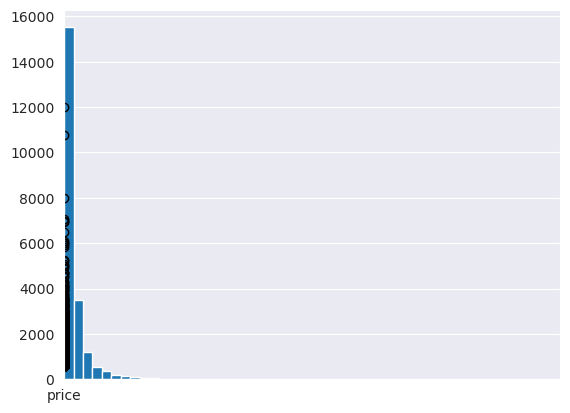

In [30]:
data = products['price']
plt.hist(data, bins=50)
plt.show()

In [31]:
products['price'].describe()

count    21769.000000
mean       261.487882
std        412.358708
min          1.590000
25%         74.990000
50%        139.900000
75%        279.000000
max      11999.950000
Name: price, dtype: float64

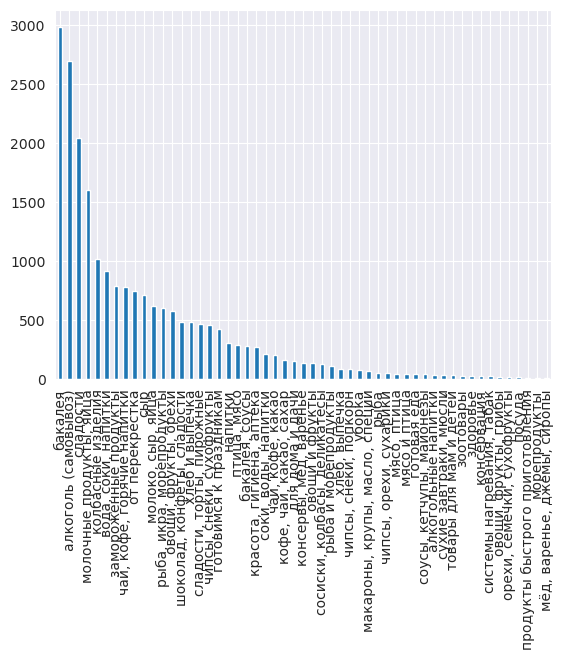

In [32]:
products['category_name'].value_counts().plot.bar()
plt.show()

In [33]:
products['general_category'] = np.nan

def general_category(row):
    if 'молоко' in row['category_name'] or 'молочные' in row['category_name'] or 'сыр' in row['category_name'] or 'яйца' in row['category_name']:
        return 'Молочные продукты'
    elif 'мясные' in row['category_name'] or 'колбасные' in row['category_name']  or 'мясо' in row['category_name'] or 'сосиски' in row['category_name']:
        return 'Мясные продукты'
    elif 'рыба' in row['category_name']:
        return 'Рыба и морепродукты'
    elif 'овощи' in row['category_name'] or 'фрукты' in row['category_name'] or 'орехи' in row['category_name'] or 'снеки' in row['category_name']:
        return 'Овощи, фрукты, закуски'
    elif 'бакалея' in row['category_name'] or 'соусы' in row['category_name'] or 'макароны' in row['category_name'] or 'консервы' in row['category_name'] or 'мед' in row['category_name'] or 'варенье' in row['category_name']:
        return 'Бакалея и соусы'
    elif 'сладости' in row['category_name']:
        return 'Сладости'
    # elif 'консервы' in row['category_name'] or 'мед' in row['category_name'] or 'варенье' in row['category_name']:
    #     return 'Консервы, мед, варенье'
    elif 'выпечка' in row['category_name'] or 'хлеб' in row['category_name']:
        return 'Выпечка и хлеб'
    elif 'чай' in row['category_name'] or 'кофе' in row['category_name'] or 'сахар' in row['category_name']:
        return 'Чай, кофе, какао, сахар'
    elif 'напитки' in row['category_name'] or 'алкоголь' in row['category_name']:
        return 'Напитки'
    else:
        return 'Прочее'

products['general_category'] = products.apply(general_category, axis=1)
products.general_category = products.general_category.astype('category')
products.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,general_category
20657,20658,ashan,19408535,Контейнер для специй и заварки «Мультидом» Шар...,konteyner-d-speciy-i-zav-shar-d,"чай, кофе, горячие напитки",chay-kofe-sladosti,220.99,"Чай, кофе, какао, сахар"
21096,21097,ashan,11682641,"Сок «Сады Придонья» Мультифрукт с мякотью, 2 л",sok-mult-2l-sady-pridonya,"вода, соки, напитки",voda-soki-napitki,169.90,Напитки
1515,1516,perekrestok,21545,"Приправа Kotanyi чили острый в мельнице, 35г",priprava-kotanyi-cili-ostryj-v-melnice-35g,"макароны, крупы, масло, специи",makarony-krupy-maslo-specii,279.99,Бакалея и соусы
4280,4281,magnit,1000247024,Приправа Индана для картофеля 15г,priprava-indana-dlya-kartofelya-15g,"бакалея, соусы",bakaleya-sousy,29.99,Бакалея и соусы
1126,1127,perekrestok,352169,"Конгрио чёрный кусок замороженный Маркет, 330г",kongrio-cernyj-kusok-zamorozennyj-market-330g,от перекрёстка,ot-perekrestka,329.99,Прочее
19492,19493,ashan,15695466,"Соль «Щепотка» Лимон-имбирь, 220 г",sol-lim-imb-shchepotka-220g,бакалея,bakaleya,208.99,Бакалея и соусы
15045,15046,ashan,18449645,"Вафли Joga апельсин манго, 35 г",vafli-joga-apelsin-mango-35g,сладости,konditerskie_izdeliya,29.95,Сладости
8097,8098,ashan,18278814,Пивной напиток Brewlok Кикимора темный нефильт...,pivnoy-nap-kikimora-n-f-0-5l,алкоголь (самовывоз),alkogol,188.99,Напитки
18189,18190,ashan,103014,"Лапша MIDORI Соба гречневая, 300 г",lapsha-js-soba-grechnevaya-300-g,бакалея,bakaleya,117.99,Бакалея и соусы
8139,8140,ashan,13950045,Пивной напиток Seth and Riley's Garage Hard Ca...,piv-nap-garage-pear-0-4l-but,алкоголь (самовывоз),alkogol,79.96,Напитки


In [34]:
products.category_name = products.category_name.astype('category')
products.category_code = products.category_code.astype('category')
products.general_category = products.general_category.astype('category')
products.dtypes

id                     int64
shop                  object
product_id             int64
name                  object
code                  object
category_name       category
category_code       category
price                float64
general_category    category
dtype: object

In [35]:
def preprocess_text(input_string):
    clear_string = input_string.translate(str.maketrans('', '', string.punctuation + string.digits))
    clear_string = clear_string.lower()
    return clear_string

products['clear_category']=products['category_name'].apply(preprocess_text)
products.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,general_category,clear_category
12188,12189,ashan,137360,"Сосиски Венские «Клинский», 470 г",sosiski-klinskiy-venskie-470-g,колбасные изделия,kolbasnye-izdeliya,326.49,Мясные продукты,колбасные изделия
9867,9868,ashan,17714195,"Йогурт питьевой TEOS Active со вкусом манго 1,...",yp-mango-teos-1-8-260g-bzmzh,"молочные продукты, яйца",moloko-syr-yayca,74.99,Молочные продукты,молочные продукты яйца
5944,5945,magnit,1000420895,Мороженое Чистая линия Волшебный фонарь Пломби...,morozhenoye-chistaya-liniya-volshebny-fonar-pl...,замороженные продукты,zamorozhennye-produkty,109.99,Прочее,замороженные продукты
14240,14241,ashan,6164308,Паста рыбная «Европром» Крем-Фиш из тунца желт...,pasta_krem_fish_tunec150_gr,"рыба, икра, морепродукты",ryba-ikra-moreprodukty,107.99,Рыба и морепродукты,рыба икра морепродукты
18690,18691,ashan,3605750,Набор кулинарных форм «Мультидом» Круг,nabor-kulinarnyh-form-multidom-krug,бакалея,bakaleya,119.99,Бакалея и соусы,бакалея
18887,18888,ashan,8341625,"Патиссоны АШАН Красная птица маринованные, 0,7...",kppatissony_720ml,бакалея,bakaleya,219.99,Бакалея и соусы,бакалея
5262,5263,magnit,1000096355,Чай черный Greenfield Golden Ceylon 200г,chay-cherny-greenfield-golden-ceylon-200g,"чай, кофе, какао",chay-kofe-kakao,349.99,"Чай, кофе, какао, сахар",чай кофе какао
15383,15384,ashan,19969021,Зефир «Белевская пастильная мануфактура» Ванил...,zefir-vanilnyy-v-shok-glaz-175g,сладости,konditerskie_izdeliya,169.90,Сладости,сладости
18907,18908,ashan,13603602,"Паштет шпротный «Каждый день», 160 г",kd-pashtet-shprotnyy-160gr,бакалея,bakaleya,27.99,Бакалея и соусы,бакалея
21533,21534,ashan,129479,"Морс клюквенный «Чудо-Ягода», 970 мл",mors-klyukvennyy-chudo-yagoda-970-ml,"вода, соки, напитки",voda-soki-napitki,218.96,Напитки,вода соки напитки


In [36]:
x = products.clear_category
y = products.general_category
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print('Score:', text_clf.score(X_test, y_test))

Score: 0.9995824053452116


In [37]:
joblib.dump(text_clf, 'model.pkl')

['model.pkl']

In [38]:
c = sqlite3.connect('prods.db')
pr = pd.read_sql("SELECT * FROM products", c)

pr.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price
3531,3532,magnit,1000316962,Сыр Брест-Литовск Российский 50% 200г,syr-brestlitovsk-rossiysky-50-200g,"Молоко, сыр, яйца",moloko-syr-yaytsa,199.99
17216,17217,ashan,135251,"Суп куриный АШАН Красная птица с лапшой, 350 г",konservy-auchan-krasnaya-ptica-sup-kurinyy-350-g,Бакалея,bakaleya,136.99
8701,8702,ashan,548163,"Творог «МУ-У» 9% БЗМЖ, 180 г",tvorog-mu-u-9-180-g,"Молочные продукты, яйца",moloko-syr-yayca,59.90
16573,16574,ashan,223812,"Мармелад «Ударница» со вкусом дыни, 325 г",marmelad-udarnica-so-vkusom-dyni-325-g,Сладости,konditerskie_izdeliya,129.99
10597,10598,ashan,18695271,"Сыр рассольный Molodo balance Брынза 45% БЗМЖ,...",syr-brynza-45-200g-molodo,Сыр,syry,149.96
9405,9406,ashan,103279,Молоко сгущенное «Рогачевъ» цельное с сахаром ...,moloko-sgushchennoe-rogachev-celnoe-s-saharom-...,"Молочные продукты, яйца",moloko-syr-yayca,143.49
389,390,perekrestok,61416,Набор кондитерских изделий Алёнка Веселые кани...,nabor-konditerskih-izdelij-alenka-veselye-kani...,Готовимся к праздникам,gotovimsa-k-prazdnikam,899.99
18880,18881,ashan,103609,"Паста томатная «ПОМИДОРКА» 100% натуральная, 2...",pasta-pomidorka-tomatnaya-270-ml,Бакалея,bakaleya,143.99
12114,12115,ashan,134803,Колбаса вареная «Великолукский мясокомбинат» Д...,kolbasa-varenaya-velikolukskiy-myasokombinat-d...,Колбасные изделия,kolbasnye-izdeliya,275.99
11272,11273,ashan,546440,"Биточки куриные «Первая Свежесть» охлажденные,...",bitochki-kurinye-pervaya-svezhest-ohlazhdennye...,"Птица, мясо",ptica-myaso,157.99


In [39]:
with open('model.pkl', 'rb') as f:
    clf2 = joblib.load(f)

def preprocess_text(input_string):
    clear_string = input_string.translate(str.maketrans('', '', string.punctuation + string.digits))
    clear_string = clear_string.lower()
    return clear_string

pr['clear_category'] = pr['category_name'].apply(preprocess_text)

prediction = clf2.predict(pr['clear_category'])
pr['general_category'] = prediction

pr.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,clear_category,general_category
437,438,perekrestok,260810,Мороженое сливочное Мятное с брауни 10% Зелёна...,morozenoe-slivocnoe-matnoe-s-brauni-10-zelenaa...,От Перекрёстка,ot-perekrestka,109.99,от перекрёстка,Прочее
13727,13728,ashan,230222,Курочка «Российская Корона» запеченная под сыр...,kurochka-rossiyskaya-korona-zapechennaya-pod-s...,Замороженные продукты,zamorozhennye-produkty,221.99,замороженные продукты,Прочее
11313,11314,ashan,2397160,"Колбаса «Россиянка» Юбилейная, 200 г",kolbasa-rossiyanka-yubilelnaya-200-g,Колбасные изделия,kolbasnye-izdeliya,109.90,колбасные изделия,Мясные продукты
7282,7283,ashan,6062759,"Водка «Столичная» Россия, 0,5 л",vodka_stolichnaya_05l_40,Алкоголь (самовывоз),alkogol,359.96,алкоголь самовывоз,Напитки
17576,17577,ashan,17305264,"Горчица «КУХМАСТЕР» Русская, 210 г",gorchica-210g-russkaya,Бакалея,bakaleya,68.99,бакалея,Бакалея и соусы
12778,12779,ashan,19503104,"Овощи для жарки Hortex Средиземноморские, 400 г",ov-smes-sredizemnomor-horteks,"Овощи, фрукты, орехи",ovoschi-frukty-zelen-griby-yagody,196.99,овощи фрукты орехи,"Овощи, фрукты, закуски"
10022,10023,ashan,18890739,"Йогурт питьевой «АктиБио» натуральный 1,8% БЗМ...",yp-natur-1-8-260g-aktibio-bzmzh,"Молочные продукты, яйца",moloko-syr-yayca,59.96,молочные продукты яйца,Молочные продукты
19457,19458,ashan,227775,Смесь риса PROSTO Гармония фитнеса в пакетиках...,smes-risovaya-prosto-garmoniya-fitnesa-500-g,Бакалея,bakaleya,199.99,бакалея,Бакалея и соусы
4989,4990,magnit,1000328472,Шоколадный батончик Bounty Райское манго 52г,shokoladny-batonchik-bounty-rayskoye-mango-52g,"Сладости, торты, пирожные",sladosti-torty-pirozhnye,45.99,сладости торты пирожные,Сладости
2947,2948,perekrestok,17294,Мыло Palmolive Натурэль туалетное твердое с эк...,mylo-palmolive-naturel-tualetnoe-tverdoe-s-eks...,"Красота, гигиена, аптека",krasota-gigiena-apteka,85.99,красота гигиена аптека,Прочее


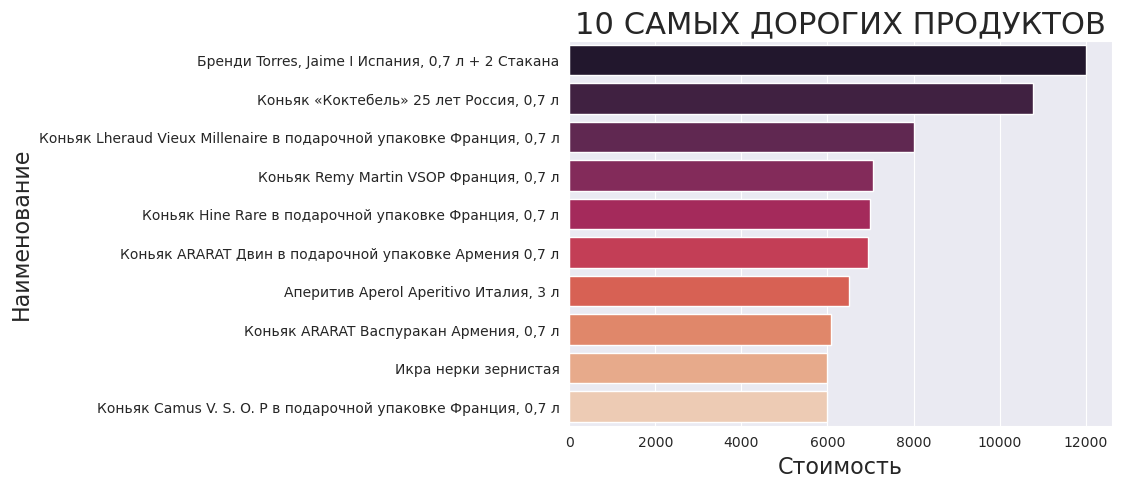

In [40]:
top_10 = pr.sort_values(by='price', ascending=False).head(10)
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')
plt.title('10 САМЫХ ДОРОГИХ ПРОДУКТОВ', fontsize=22)
plt.xlabel('Стоимость', fontsize=16)
plt.ylabel('Наименование', fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()
#plt.savefig('top_10_max.png', bbox_inches = 'tight')

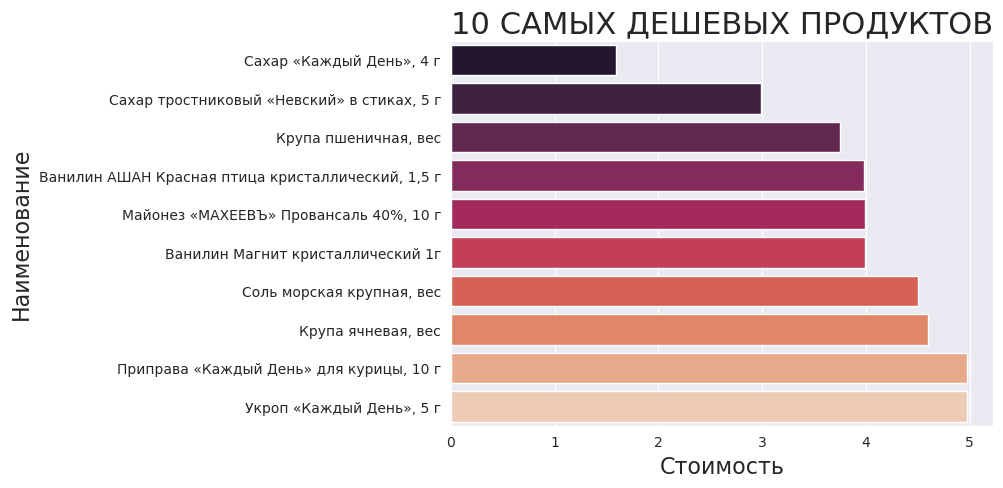

In [41]:
top_10 = pr.sort_values(by='price', ascending=True).head(10)
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')
plt.title('10 САМЫХ ДЕШЕВЫХ ПРОДУКТОВ', fontsize=22)
plt.xlabel('Стоимость', fontsize=16)
plt.ylabel('Наименование', fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

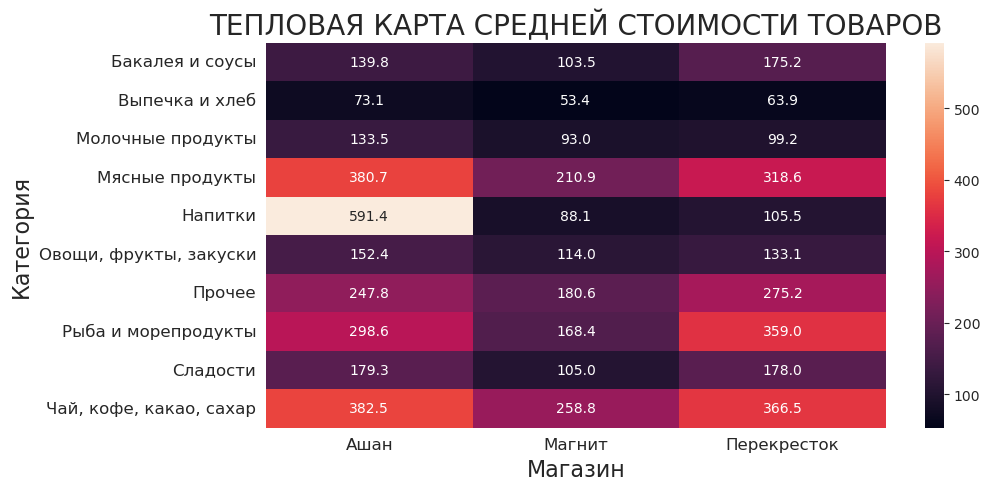

In [42]:
conditions = [(pr['shop'] == 'ashan'), (pr['shop'] == 'magnit'), (pr['shop'] == 'perekrestok')]
values = ['Ашан', 'Магнит', 'Перекресток']
pr['shop_rus'] = np.select(conditions, values)
pr.shop_rus = pr.shop_rus.astype('category')

plt.figure(figsize=(10,5))
pivot_table = pr.pivot_table(index='general_category', columns='shop_rus', values='price', aggfunc='mean')
plt.title('ТЕПЛОВАЯ КАРТА СРЕДНЕЙ СТОИМОСТИ ТОВАРОВ', fontsize=20)
sns.heatmap(pivot_table, cmap='rocket', annot=True, fmt=".1f")
plt.xlabel('Магазин', fontsize=16)
plt.ylabel('Категория', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

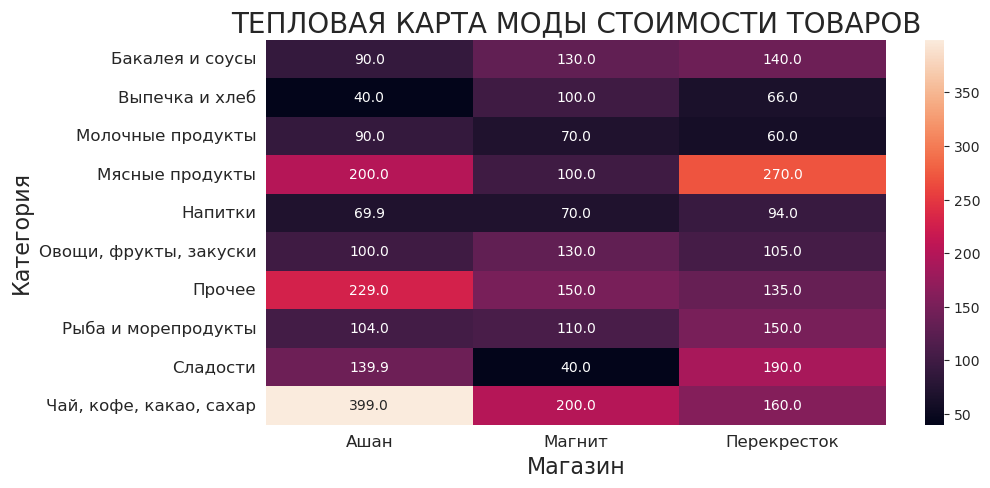

In [43]:
plt.figure(figsize=(10,5))
pivot_table = pr.pivot_table(index='general_category', columns='shop_rus', values='price', aggfunc=lambda x: x.mode().max())
plt.title('ТЕПЛОВАЯ КАРТА МОДЫ СТОИМОСТИ ТОВАРОВ', fontsize=20)
sns.heatmap(pivot_table, cmap='rocket', annot=True, fmt=".1f")
plt.xlabel('Магазин', fontsize=16)
plt.ylabel('Категория', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [44]:
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['лента','ассорт','разм','арт','что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'г', 'шт'])

In [76]:
import re

def remove_words_with_g(string):
    pattern = r"\b\d+(г|шт)\b"
    modified_string = re.sub(pattern, "", string)
    return modified_string.strip()

def preprocess_text(text):
    text = str(text)
    text = remove_words_with_g(text)
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and len(token)>=3 \
              and token.strip() not in punctuation \
              and token.isdigit()==False]
    text = " ".join(sorted(tokens))
    return text

preprocess_text("Вы говорили: Нам пора расстаться, Что вас измучила Моя шальная жизнь, Что вам пора за дело приниматься, А мой удел - Катиться дальше, вниз.")

'вниз говорить далеко дело жизнь измучивать катиться пора пора приниматься расставаться удел шальной'

In [77]:
print("Было:", products['name'][0])
print("Стало:", preprocess_text(products['name'][0]))
print()
print("Было:", products['name'][10])
print("Стало:", preprocess_text(products['name'][10]))

Было: Голубика Маркет Fresh, 125г
Стало: fresh голубика маркет

Было: Яйцо куриное столовое С1 Маркет Перекрёсток, 10шт
Стало: куриный маркет перекресток столовый яйцо


In [78]:
products['clear_name']=products['name'].apply(preprocess_text)
products.head()

,id,shop,product_id,name,code,category_name,category_code,price,general_category,clear_category,clear_name
0,1,perekrestok,32392,"Голубика Маркет Fresh, 125г",golubika-market-fresh-125g,готовимся к праздникам,gotovimsa-k-prazdnikam,239.99,Прочее,готовимся к праздникам,fresh голубика маркет
1,2,perekrestok,10299,"Горошек зелёный Маркет Перекрёсток, 400г",gorosek-zelenyj-market-perekrestok-400g,готовимся к праздникам,gotovimsa-k-prazdnikam,93.99,Прочее,готовимся к праздникам,горошек зеленый маркет перекресток
2,3,perekrestok,404062,Колбаса Докторская варёная категории А в натур...,kolbasa-doktorskaa-varenaa-kategorii-a-v-natur...,готовимся к праздникам,gotovimsa-k-prazdnikam,779.99,Прочее,готовимся к праздникам,collection вареный докторский категория колбас...
3,4,perekrestok,34160,Клементины,klementiny,готовимся к праздникам,gotovimsa-k-prazdnikam,229.99,Прочее,готовимся к праздникам,клементина
4,5,perekrestok,32227,Бананы,banany,готовимся к праздникам,gotovimsa-k-prazdnikam,119.99,Прочее,готовимся к праздникам,банан


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline

x = products.clear_name
y = products.general_category
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                     ('tfidf', TfidfTransformer()), 
                    ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print('Score:', text_clf.score(X_test, y_test))

Score: 0.8801102434542949
